# Regressions for Quality Filter Analysis

In [86]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set(context='paper', style='white', font_scale=1.3)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Model

In [2]:
from lr.eval import load_model
clf, clf_vectorizer = load_model("../logistic_regression/new_model/")

## Load and Featurize Data

In [ ]:
from data.loader import load_data, get_high_schools, compute_stats
from data.featurize import featurize, preprocess

In [3]:
df = load_data()

  0%|          | 0/1059005 [00:00<?, ?it/s]

In [5]:
high_schools = get_high_schools(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 935428/935428 [00:01<00:00, 560136.98it/s]


In [9]:
stats = compute_stats(high_schools)
stats

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

,county:state,school:county:state,state,text,zipcode:county:state
high,552,1410,51,910431,1329


In [68]:
features = featurize(high_schools)

initializing features...
merging zipcode features...
loading school data...
merging school data...


  0%|          | 0/1410 [00:00<?, ?it/s]

loading and merging county data...


In [71]:
features.shape

(1410, 143)

## Document Feature Exploration

In [106]:
from data.loader import load_and_score
from data.constants import DATA_DIR
high_news = load_and_score(path=DATA_DIR / "articles-high-reliability-clean.jsonl")

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/9939 [00:00<?, ?it/s]

NameError: name 'np' is not defined

In [95]:
from data.cluster import cluster_text

In [97]:
# sample 10K opinion articles
opeds = high_schools.loc[high_schools.category.apply(lambda x: "opinion" in x)].sample(10000).copy().reset_index()


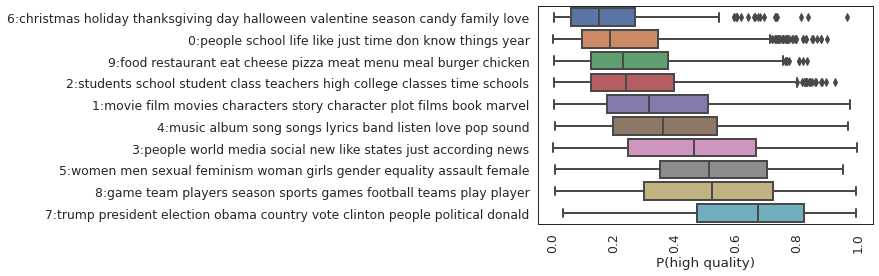

In [99]:
# cluster text via prob high quality
clustered_opeds = cluster_text(opeds, num_clusters=10, num_words=10, plot_boxplot=True)

## Document Regression

In [ ]:
text_features = {}
text_features['num_tokens'] = p.num_tokens
text_features['prob_high_quality'] = p.prob_high_quality

first_person_words = set(["i", "me", "my", "mine", "our", "ours", "us", "we", 'your', 'yours'])
third_person_words = set(["he", "him", "his", "she", "her", "hers", "it", "its", "they", "them", "their", "theirs"])
text_features['first_person'] = p.text.progress_apply(lambda x: first_person_words & set(x.lower().split()))
text_features['third_person'] = p.text.progress_apply(lambda x: third_person_words & set(x.lower().split()))

text_features['topic'] = p.cluster

text_features = pd.DataFrame(text_features)
text_features['first_person'] = text_features['first_person'].progress_apply(lambda x: len(x))
text_features['third_person'] = text_features['third_person'].progress_apply(lambda x: len(x))
text_features['advertisement'] = p.text.progress_apply(lambda x: "advertisement" in x)




## Demographic Feature Exploration

In [ ]:
from data.viz import build_correlation_plots

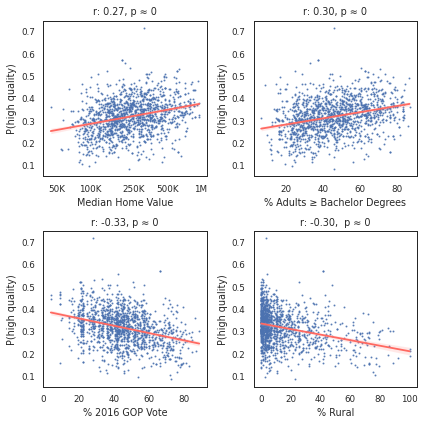

In [90]:
features_ = preprocess(features, REGRESSION_FEATURES, impute_only=True)
build_correlation_plots(features_, save=False)

## Demographic Regressions

In [ ]:
import statsmodels.formula.api as smf
from data.constants import REGRESSION_FEATURES


In [91]:
features_ = preprocess(features, REGRESSION_FEATURES)
features_.shape

(1379, 146)

In [92]:
formula = """
        prob_high_quality ~ 
        1 +
        mixed_ratio +
        pacific_islander_ratio + 
        hispanic_ratio +
        asian_ratio +
        black_ratio +
        native_ratio +
        pupil_ratio +
        school_size + 
        city + 
        rural + 
        suburb + 
        is_charter + 
        is_magnet  + 
        num_degree_holders + 
        median_home_value
        """

model = smf.ols(formula=formula, data=features_).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      prob_high_quality   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     14.90
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           5.03e-36
Time:                        20:40:10   Log-Likelihood:                 1677.0
No. Observations:                1379   AIC:                            -3322.
Df Residuals:                    1363   BIC:                            -3238.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [93]:
formula = """
        prob_high_quality ~ 
        1 +
        mixed_ratio +
        pacific_islander_ratio + 
        hispanic_ratio +
        asian_ratio +
        black_ratio +
        native_ratio +
        pupil_ratio +
        school_size + 
        city + 
        rural + 
        suburb + 
        is_charter + 
        is_magnet  + 
        num_degree_holders + 
        median_home_value + 
        rep_share_2016
        """

model = smf.ols(formula=formula, data=features_).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      prob_high_quality   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     17.36
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           7.70e-45
Time:                        20:40:13   Log-Likelihood:                 1700.2
No. Observations:                1379   AIC:                            -3366.
Df Residuals:                    1362   BIC:                            -3278.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0